# Data Visualization

In [1]:
import pandas as pd
df = pd.read_csv('Dataset .csv')

# Extract first cuisine as main cuisine
df['Main Cuisine'] = df['Cuisines'].apply(lambda x: str(x).split(',')[0].strip() if pd.notnull(x) else 'Unknown')

#print("\nTop 10 most common cuisines:")
#display(df['Main Cuisine'].value_counts().head(10))

## Histrogram

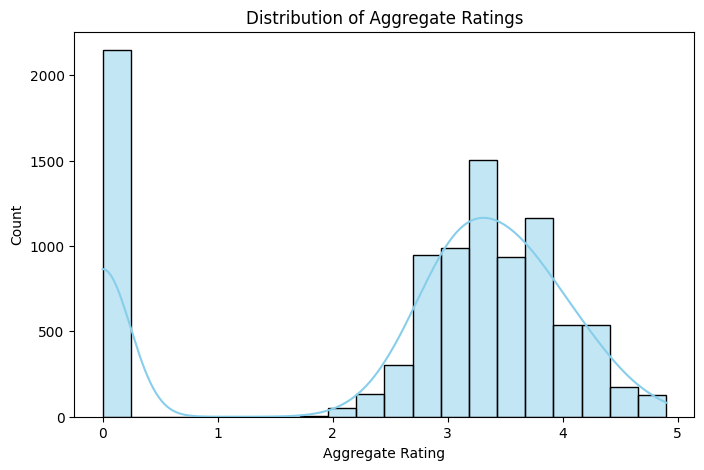

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))


sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()


## Bar Plot

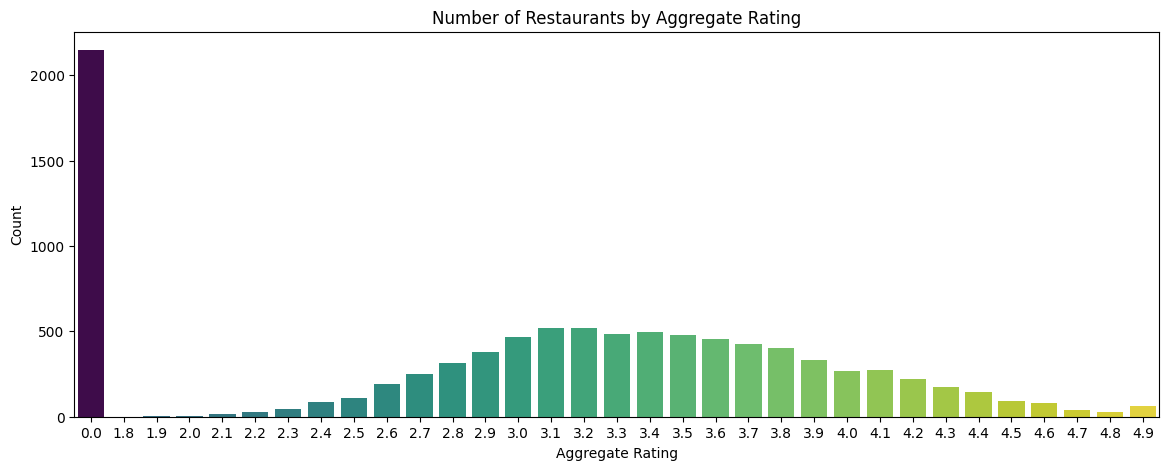

In [3]:
# Bar plot of rating counts
rating_counts = df['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(14,5))
sns.barplot(x=rating_counts.index, 
            y=rating_counts.values,
            hue=rating_counts.index,
            palette='viridis',
            legend= False)
plt.title('Number of Restaurants by Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()


## Compare average ratings of different cuisines

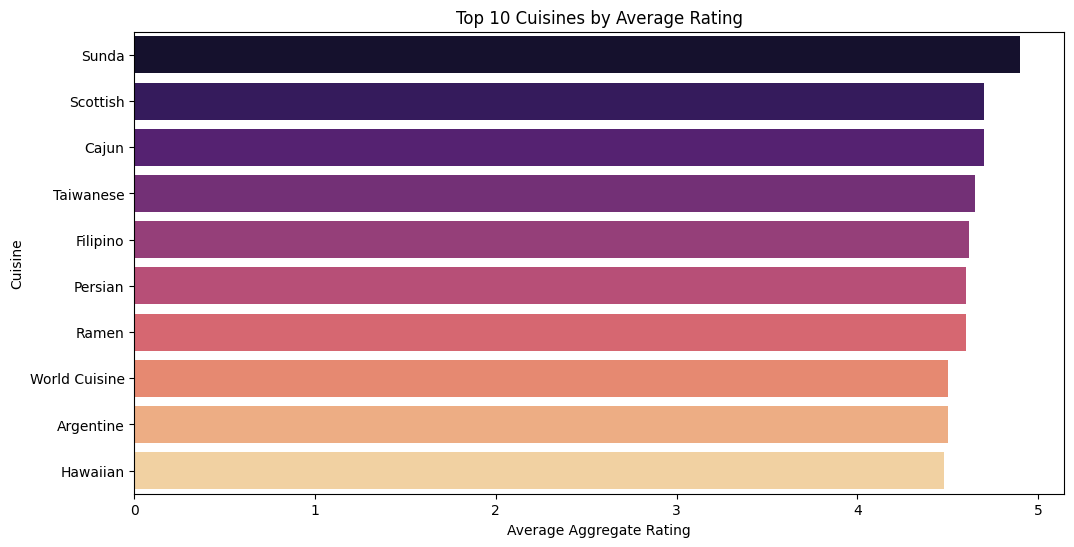

In [10]:
# Use only rated restaurants
rated_df = df[df['Aggregate rating'] > 0]

avg_rating_cuisine = rated_df.groupby('Main Cuisine')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_rating_cuisine.values, 
            y=avg_rating_cuisine.index, 
            hue=avg_rating_cuisine.index,
            palette='magma',
            legend=False)
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine')
plt.show()

## Convert 'Yes'/'No' to 1/0 before analysis

In [5]:
yes_no_cols = ['Has Table booking', 'Has Online delivery', 
               'Is delivering now', 'Switch to order menu']

for col in yes_no_cols:
    df[col + ' (encoded)'] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)

rated_df = df[df['Aggregate rating'] > 0].copy()


## Has Table booking vs Aggregate rating

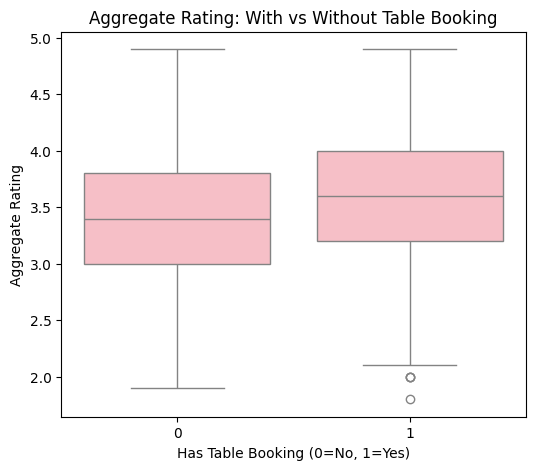

In [6]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Has Table booking (encoded)', 
            y='Aggregate rating', 
            data=rated_df,
            color='lightpink')
plt.title('Aggregate Rating: With vs Without Table Booking')
plt.xlabel('Has Table Booking (0=No, 1=Yes)')
plt.ylabel('Aggregate Rating')
plt.show()